In [1]:
!pip install matplotlib seaborn

In [3]:
# Import necessary libraries that we are going to use in this case, pandas,numpy ,seaborn and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

# 1.Data Overview and Cleaning:

In [6]:
# Importing data sets
#loading the dataset
data = pd.read_csv("1. Weather Data.csv")

In [8]:
#view of first 10 rows of dataset
data.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [10]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [12]:
#checking data types
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [14]:
#number of records & records
data.shape

(8784, 8)

In [16]:
# Check for null & missing values
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [18]:
# Check for duplicate records
duplicate_mask = data.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_mask.sum()
print(f"Number of duplicate records: {num_duplicates}")

# View duplicate records
if num_duplicates > 0:
    print("Duplicate records:")
    print(data[duplicate_mask])

# Optionally: Remove duplicate records
# weather_df = weather_df.drop_duplicates()

# Save the cleaned dataset (if duplicates were removed)
# weather_df.to_csv('cleaned_weather_dataset.csv', index=False)

Number of duplicate records: 0


# 2.Statistical Summary

In [22]:
# Statistical summary of numerical ,mean,mode,median,standard deviation
data.describe(include="all")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [24]:
#including mode
data.mode()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,16.6,-0.9,68.0,9.0,25.0,101.13,Mainly Clear
1,1/1/2012 10:00,NaN,12.9,NaN,NaN,NaN,NaN,NaN
2,1/1/2012 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2012 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8779,9/9/2012 5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,9/9/2012 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,9/9/2012 7:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,9/9/2012 8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


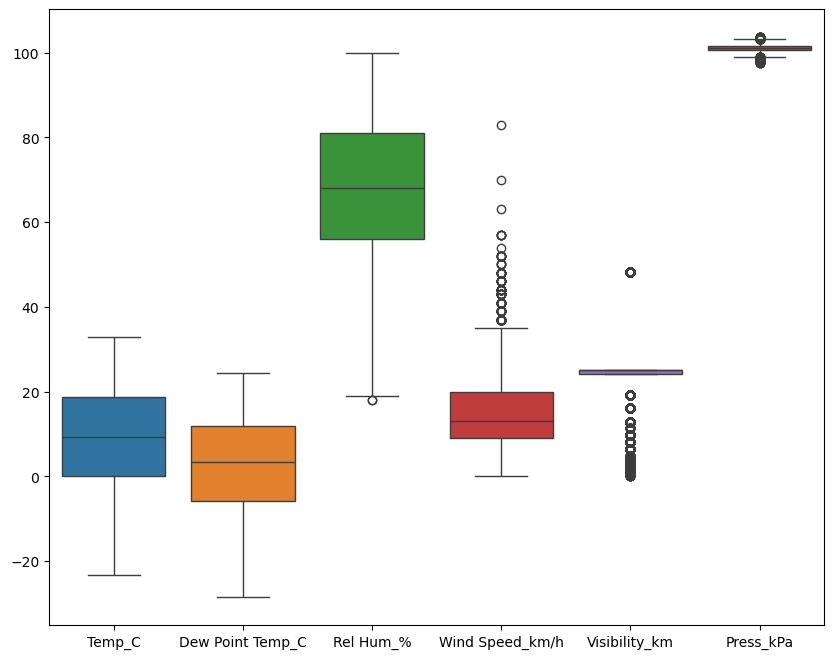

In [26]:
#check for outliers- using a box plot to identify columns with outliers
#figure size
plt.figure(figsize = (10,8))
#creating box plot
sns.boxplot(data = data)
#display the box plot chart
plt.show()

In [28]:
#Temp_C has no outliers
#Dew Point Temp_C has no outliers
#Rel Hum_% has two/few outliers
#Wind Speed_km/h has many outliers
#Visibility_km has most outliers
#Press_kPa has more outliers also

# 3.Data Visualization

In [31]:
#Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
# Set the style for the plots
import seaborn as sns
sns.set(style="whitegrid")

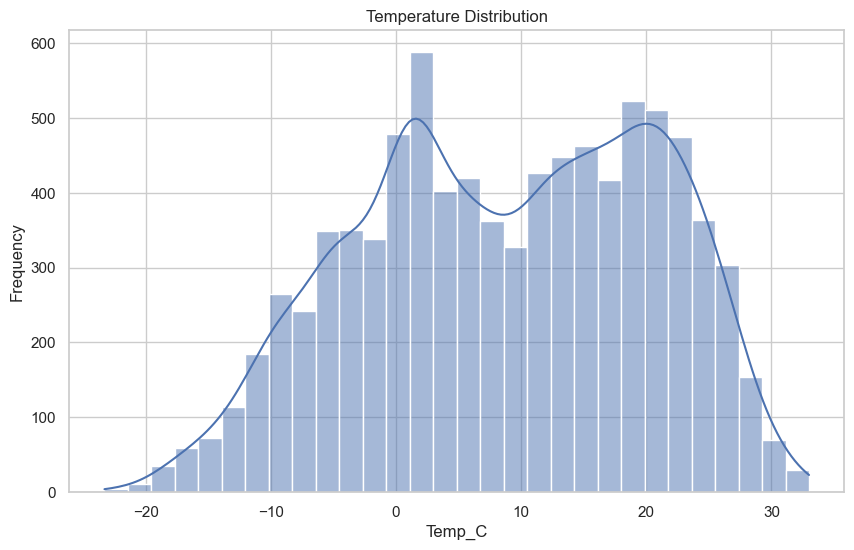

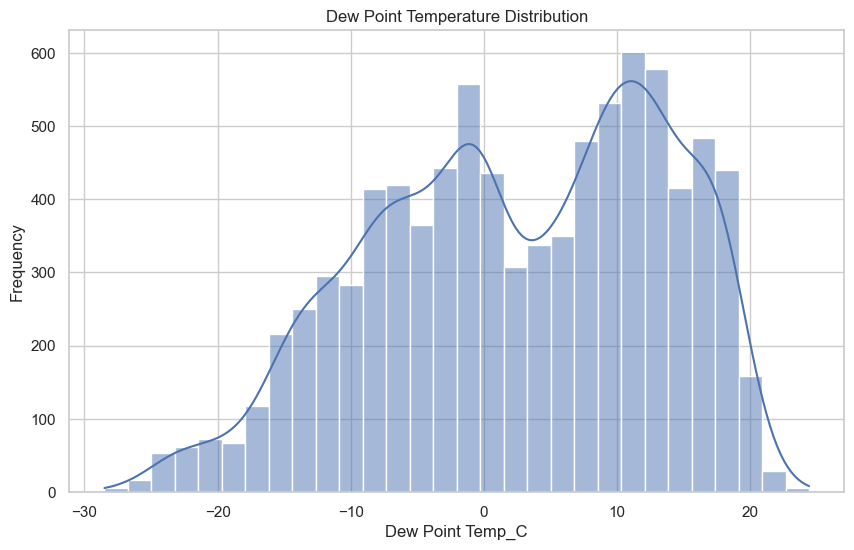

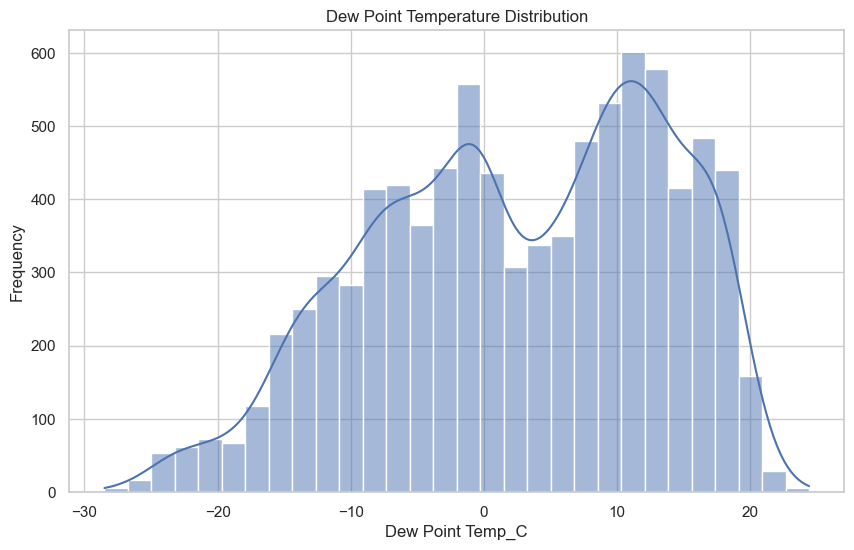

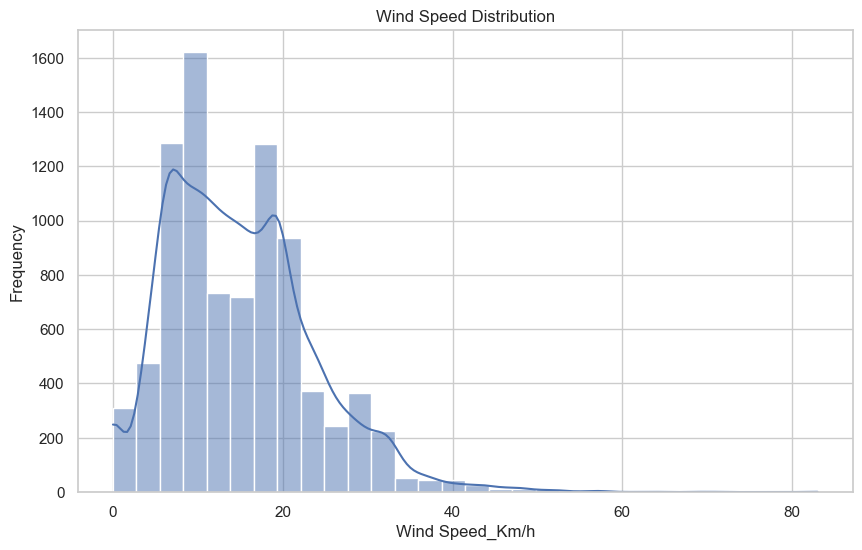

In [33]:
# Distribution of Key Weather Patterns
# Histograms and Kde plots show distribution of different weather parameters

# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Temp_C'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temp_C')
plt.ylabel('Frequency')
plt.show()

# Dew Point Distribution 
plt.figure(figsize=(10,6))
sns.histplot(data['Dew Point Temp_C'],kde=True, bins=30)
plt.title('Dew Point Temperature Distribution')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.show

# Dew Point Distribution 
plt.figure(figsize=(10,6))
sns.histplot(data['Dew Point Temp_C'],kde=True, bins=30)
plt.title('Dew Point Temperature Distribution')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.show


# Distribution of Wind Speed
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed_km/h'], kde=True, bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed_Km/h')
plt.ylabel('Frequency')
plt.show()

In [35]:
#converting time date/time column to datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [37]:
#extracting date from 'date/time' column to create column 'date'
data['Date'] = data['Date/Time'].dt.date

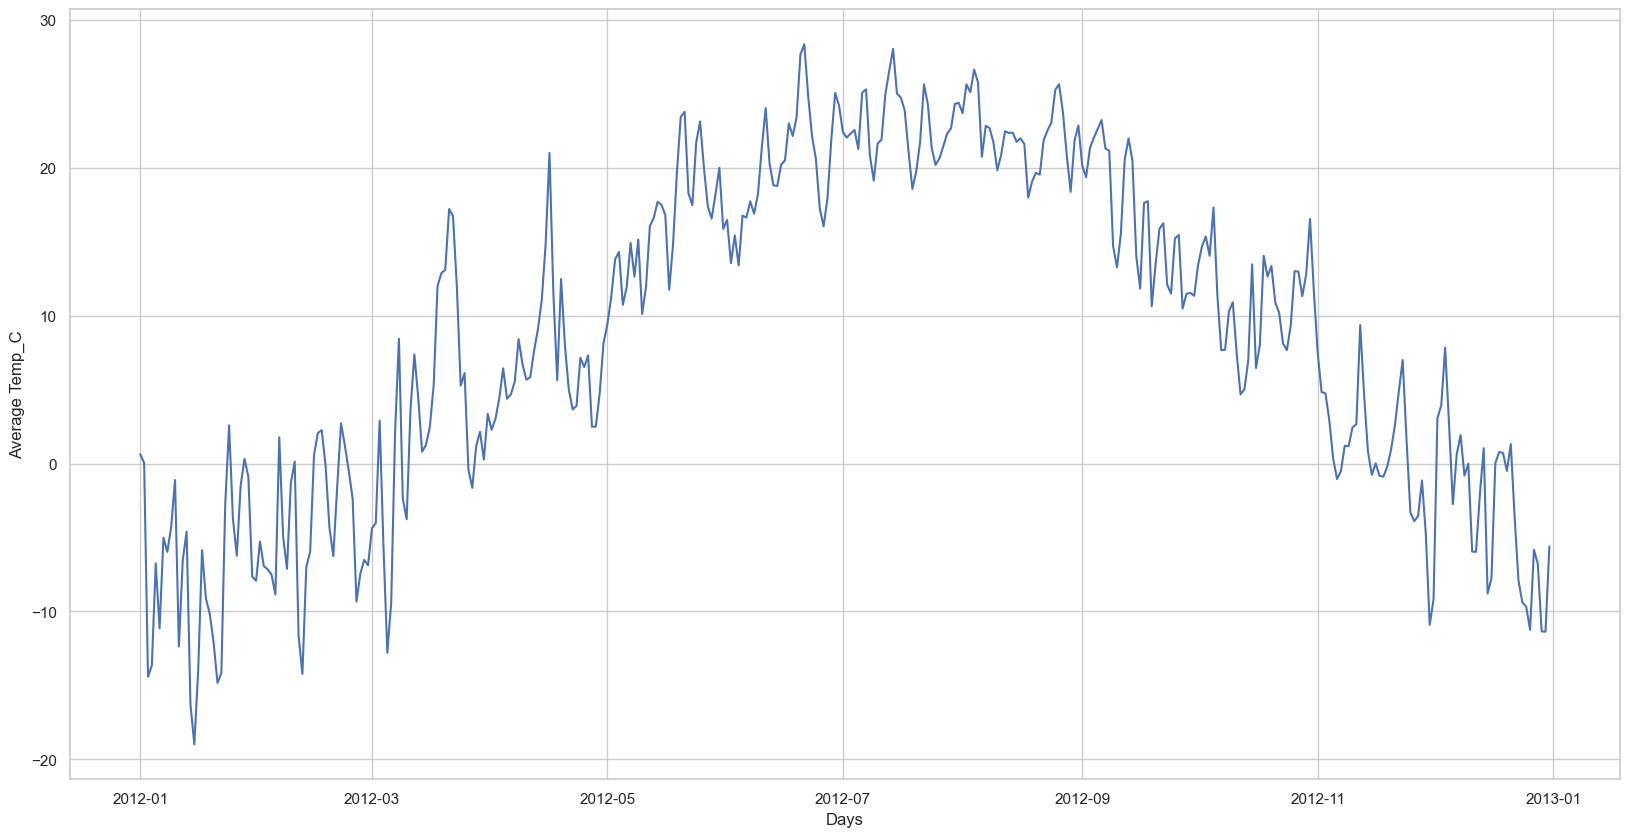

In [39]:
# Plot time series graphs to visualize changes over time
#Temp_C
plt.figure(figsize = (20,10))
#finding the average temp of each day
daily_records = data.groupby('Date').mean(numeric_only = True)['Temp_C']
x = daily_records.index
y = daily_records.values
#plotting the line chart
plt.plot(x, y)
#adding labels
plt.ylabel('Average Temp_C')
plt.xlabel('Days')
#display
plt.show()

In [41]:
#creating correlation matrix 
#selecting only the numeric columns
numeric_data = data.select_dtypes(include = [float,int])
#creating a correlation matrix
correlation_matrix = numeric_data.corr()
#display matrix
correlation_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


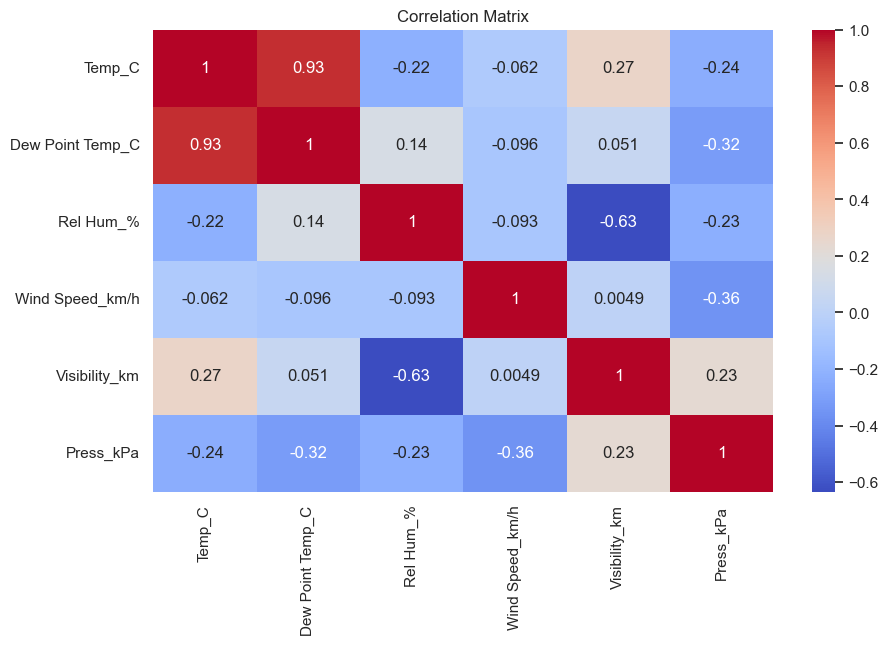

In [43]:
#heatmaps to identify relationships between different weather parameters.
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Weather Patterns and Trends

In [46]:
#Analyze and describe any trends or patterns you observe in the data.
#For instance, how do temperature and humidity vary across different seasons or months?
#1.Analyzing the Data:
#Temp_C tends to increase over time
#Wind Speed_km/h tends to increase over time same as Visibility_km
#High correlations between Temp_C and other variables, such as Dew Point Temp_C or Rel Hum_%,  
#indicate that these factors vary together across seasons.

#2.Investigate any anomalies or unusual patterns in the data. 
#Temp_C has no outliers
#Dew Point Temp_C has no outliers
#Rel Hum_% has two/few outliers
#Wind Speed_km/h has many outliers
#Visibility_km has most outliers
#Press_kPa has more outliers also

#What might be the reasons for these anomalies?
#Weather Events: Unseasonal weather.
#Data Issues: incorrect data entries.

# 5.Insights and Conclusions

In [49]:
#Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
#Correlation relationships between columns

#Positive correlated columns include;
#Dew Point Temp_C and Temp_C
#Visibility_km and Wind Speed_km/h
#Rel Hum_% and Dew Point Temp_C

#Negative correlated columns include;
#Press_kPa and Temp_C
#Rel Hum_% and Temp_C 
#Wind Speed_km/h and Temp_C 
#Rel Hum_% and Visibility_km
#Wind Speed_km/h and Rel Hum_% 
#Rel Hum_% and Press_kPa
#Press_kPa and Dew Point Temp_C
#Wind Speed_km/h and Dew Point Temp_C
#Wind Speed_km/h and Press_kPa
#Visibility_km  and Rel Hum_%

#zero correlated columns include;
#Visibility_km and Temp_C 
#Visibility_km and Press_kPa

In [51]:
#Anomalies:

#Any significant deviations from the expected patterns, such as unusual spikes in Visibility_km and Wind Speed_km/h, might indicate specific 
#weather events (e.g., heatwaves, cold snaps) or data inconsistencies. 
#Identifying these anomalies is crucial for refining data models and ensuring accurate predictions.

In [53]:
#Interesting or Surprising Findings:

#Unexpected Correlations: If any variables showed unexpected correlations (e.g., high temperature with unusually low humidity), 
#this could indicate unique local climate influences or data anomalies.
#Outliers: Anomalies in the data may have revealed rare weather events or data collection issues, 
#which are interesting from both a scientific and a practical perspective.

In [55]:
#Practical Applications:
#1.Weather Prediction:
#Improving forecast accuracy can be achieved by using insights from temperature, humidity, and other factors.
#Incorporating these correlations into predictive models can make forecasts more precise.
#2.Anomaly detection;
#Finding unusual patterns can help spot extreme weather early, which improves preparedness and response.

In [57]:
#3.Climate Research:
#Looking at long-term data helps researchers spot signs of climate change, like rising temperatures or shifting humidity patterns.

In [59]:
#4.Agricultural Planning:
#Crop Growth Optimization: Knowing temperature and humidity trends allows farmers to arrange their planting and harvesting schedules for maximum yield.
#Disaster Safety: Anticipating extreme weather helps prepare for probable challenges such as droughts or floods.


# 6.Recommendations for Further Analysis:


In [63]:
#1.Geospatial Analysis:
#Looking at weather patterns in different regions can show how local features, like mountains or cities, affect climate. 
#This helps identify unique microclimates in various areas.

In [65]:
#2.Temporal Analysis:
#Long-Term Study: Analyzing data over multiple years can uncover long-term trends like gradual climate changes or shifts in seasons.
#Monthly/Weekly Trends: Looking at data by month or week can reveal detailed patterns that might be missed in broader seasonal analysis.